In [2]:
import pandas as pd 
import numpy as np

import tensorflow
import keras
from keras import layers, optimizers, regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential

from keras.utils import plot_model

import keras.backend as K

import seaborn as sns

from sklearn import preprocessing, model_selection 

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.metrics import accuracy_score
import mlrose_hiive

In [3]:
#read data
student = pd.read_csv("student-por.csv",sep=";")

In [4]:
#rename attributes
student.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [5]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
student['final_grade'] = 'na'
student.loc[(student.final_score >= 15) & (student.final_score <= 20), 'final_grade'] = 'good' 
student.loc[(student.final_score >= 10) & (student.final_score <= 14), 'final_grade'] = 'fair' 
student.loc[(student.final_score >= 0) & (student.final_score <= 9), 'final_grade'] = 'poor' 
student.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,fair
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,fair
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,fair
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,fair


In [6]:
data = student
data = data.drop(['final_score'], axis=1)

# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.final_grade = le.fit_transform(data.final_grade)
data.tail(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_grade
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,2
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,0
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,0


In [7]:
#normalization
def normalization(X):
    mean = np.mean(X)
    std = np.std(X)
    X_t = (X - mean)/std
    return X_t

#Train and Test splitting of data     
def train_test(X_t, y):
    x_train, x_test, y_train, y_test = train_test_split(X_t, y, test_size = 0.3, random_state = 42)
    print("Train:",len(x_train), " - Test:", len(x_test))
    return x_train, x_test, y_train, y_test

In [8]:
# dataset train_test_split
X = data.drop('final_grade',axis=1)

In [9]:
X_t = normalization(X)
print("X_t:", X_t.shape)

#delete the columns with NAN value
X = X_t
X=X.dropna(axis=1,how='all')

X_t: (649, 32)


In [10]:
#normalize the data type
data["final_grade"] =data["final_grade"].astype(object)

In [11]:
data["final_grade"] =data["final_grade"].astype(int)
data = pd.get_dummies(data, columns=["final_grade"])

In [12]:
Y = data.iloc[:,32:].values

In [13]:
X = preprocessing.normalize(X, axis = 0)

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.3)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(454, 15) (454, 3) (195, 15) (195, 3)


In [310]:
# Initialize neural network object and fit object - attempt 1
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 100, bias = True, is_classifier = True, 
                                 learning_rate = 0.9, early_stopping = False, 
                                 max_attempts = 100, random_state = 3,curve=True,restarts = 100)

nn_model1.fit(X_train, Y_train)

NeuralNetwork(curve=True, hidden_nodes=[30], learning_rate=0.9,
              max_attempts=100, random_state=3, restarts=100)

In [311]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train)

y_train_accuracy = accuracy_score(Y_train, y_train_pred)

print(y_train_accuracy)

0.6453744493392071


In [312]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test)

y_test_accuracy = accuracy_score(Y_test, y_test_pred)

print(y_test_accuracy)

0.6358974358974359


In [253]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(nn_model1, X, Y, cv=cv, 
                                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

Text(0.5, 1.0, "Learning curve of Nuetral Network ('random_hill_climb')")

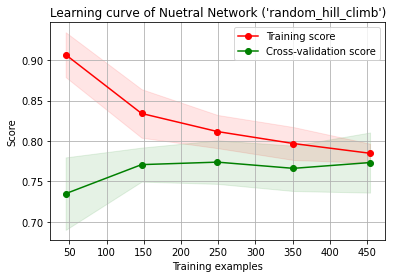

In [254]:
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve of Nuetral Network ('random_hill_climb')")

In [284]:
# Initialize neural network object and fit object - attempt 2
nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [30],activation ='relu',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1000,bias = True, is_classifier = True,
                                 learning_rate = 0.01,early_stopping = True,
                                 max_attempts = 100, random_state = 3,curve=True)

nn_model2.fit(X_train,Y_train)

NeuralNetwork(algorithm='gradient_descent', curve=True, early_stopping=True,
              hidden_nodes=[30], learning_rate=0.01, max_attempts=100,
              max_iters=1000, random_state=3)

In [285]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train)

y_train_accuracy = accuracy_score(Y_train, y_train_pred)

print(y_train_accuracy)

0.6453744493392071


In [286]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test)

y_test_accuracy = accuracy_score(Y_test, y_test_pred)

print(y_test_accuracy)

0.6410256410256411


In [287]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(nn_model2, X, Y, cv=cv, 
                                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

Text(0.5, 1.0, "Learning curve of Nuetral Network ('gradient_descent')")

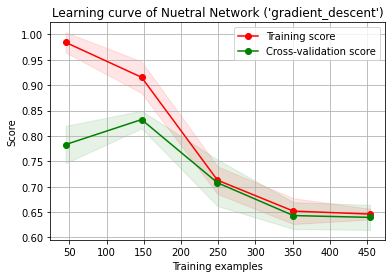

In [288]:
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve of Nuetral Network ('gradient_descent')")

In [289]:
# Initialize neural network object and fit object - attempt 1
nn_model3 = mlrose_hiive.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.9, early_stopping = True, 
                                 max_attempts = 100, random_state = 3,curve=True)

nn_model3.fit(X_train, Y_train)

NeuralNetwork(algorithm='simulated_annealing', curve=True, early_stopping=True,
              hidden_nodes=[30], learning_rate=0.9, max_attempts=100,
              max_iters=1000, random_state=3)

In [290]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model3.predict(X_train)

y_train_accuracy = accuracy_score(Y_train, y_train_pred)

print(y_train_accuracy)

0.6497797356828194


In [291]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model3.predict(X_test)

y_test_accuracy = accuracy_score(Y_test, y_test_pred)

print(y_test_accuracy)

0.6205128205128205


Text(0.5, 1.0, "Learning curve of Nuetral Network ('simulated_annealing')")

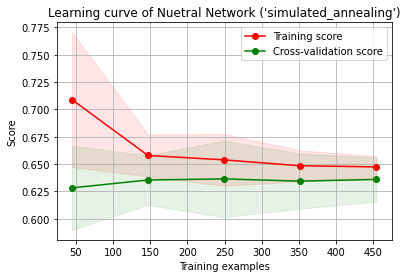

In [292]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(nn_model3, X, Y, cv=cv, 
                                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve of Nuetral Network ('simulated_annealing')")

In [297]:
# Initialize neural network object and fit object - attempt 1
nn_model4 = mlrose_hiive.NeuralNetwork(hidden_nodes = [30], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, 
                                 max_attempts = 100, random_state = 3,curve=True)

nn_model4.fit(X_train, Y_train)

NeuralNetwork(algorithm='genetic_alg', curve=True, early_stopping=True,
              hidden_nodes=[30], max_attempts=100, max_iters=1000,
              random_state=3)

In [298]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model4.predict(X_train)

y_train_accuracy = accuracy_score(Y_train, y_train_pred)

print(y_train_accuracy)

0.7687224669603524


In [299]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model4.predict(X_test)

y_test_accuracy = accuracy_score(Y_test, y_test_pred)

print(y_test_accuracy)

0.7282051282051282


Text(0.5, 1.0, "Learning curve of Nuetral Network ('genetic_alg')")

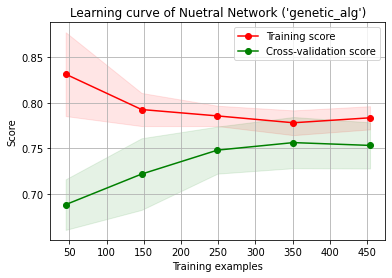

In [300]:
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(nn_model4, X, Y, cv=cv, 
                                        n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5),return_times=True)

fit_times_mean = np.mean(fit_times,axis = 1)
fit_times_std = np.std(fit_times,axis = 1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning curve of Nuetral Network ('genetic_alg')")

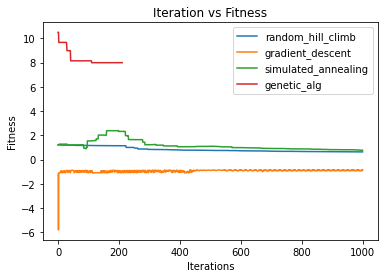

In [302]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(nn_model1.fitness_curve))), nn_model1.fitness_curve[...,0], label='random_hill_climb')  # ... and some more.
ax.plot(range(0,len(list(nn_model2.fitness_curve))), nn_model2.fitness_curve, label='gradient_descent')  # Plot some data on the axes.
ax.plot(range(0,len(list(nn_model3.fitness_curve))), nn_model3.fitness_curve[...,0], label='simulated_annealing')  # Plot more data on the axes...
ax.plot(range(0,len(list(nn_model4.fitness_curve))), nn_model4.fitness_curve[...,0], label='genetic_alg')  # Plot more data on the axes..
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

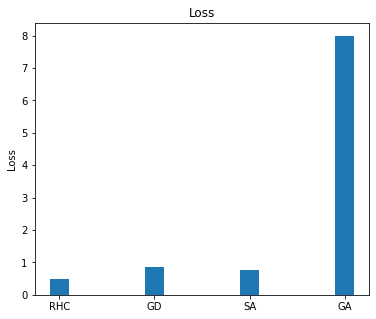

In [304]:
fig = plt.figure(figsize = (6, 5))
names = ['RHC','GD','SA','GA'] 
runtime_list = [nn_model1.loss,nn_model2.loss,nn_model3.loss,nn_model4.loss]
# creating the bar plot
plt.bar(names,runtime_list, width = 0.2)
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

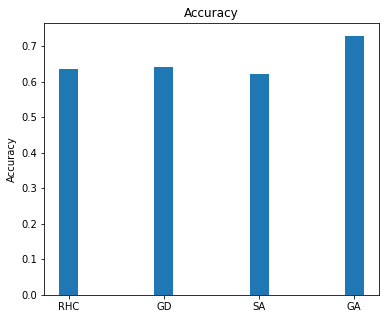

In [313]:
fig = plt.figure(figsize = (6, 5))
names = ['RHC','GD','SA','GA'] 
runtime_list = [0.6358974358974359,0.6410256410256411,0.6205128205128205,0.7282051282051282]
# creating the bar plot
plt.bar(names,runtime_list, width = 0.2)
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.show()